#Implementation of Fancy PCA 


### Cited: https://aparico.github.io/


In [495]:
from PIL import Image
import numpy as np
import cv2

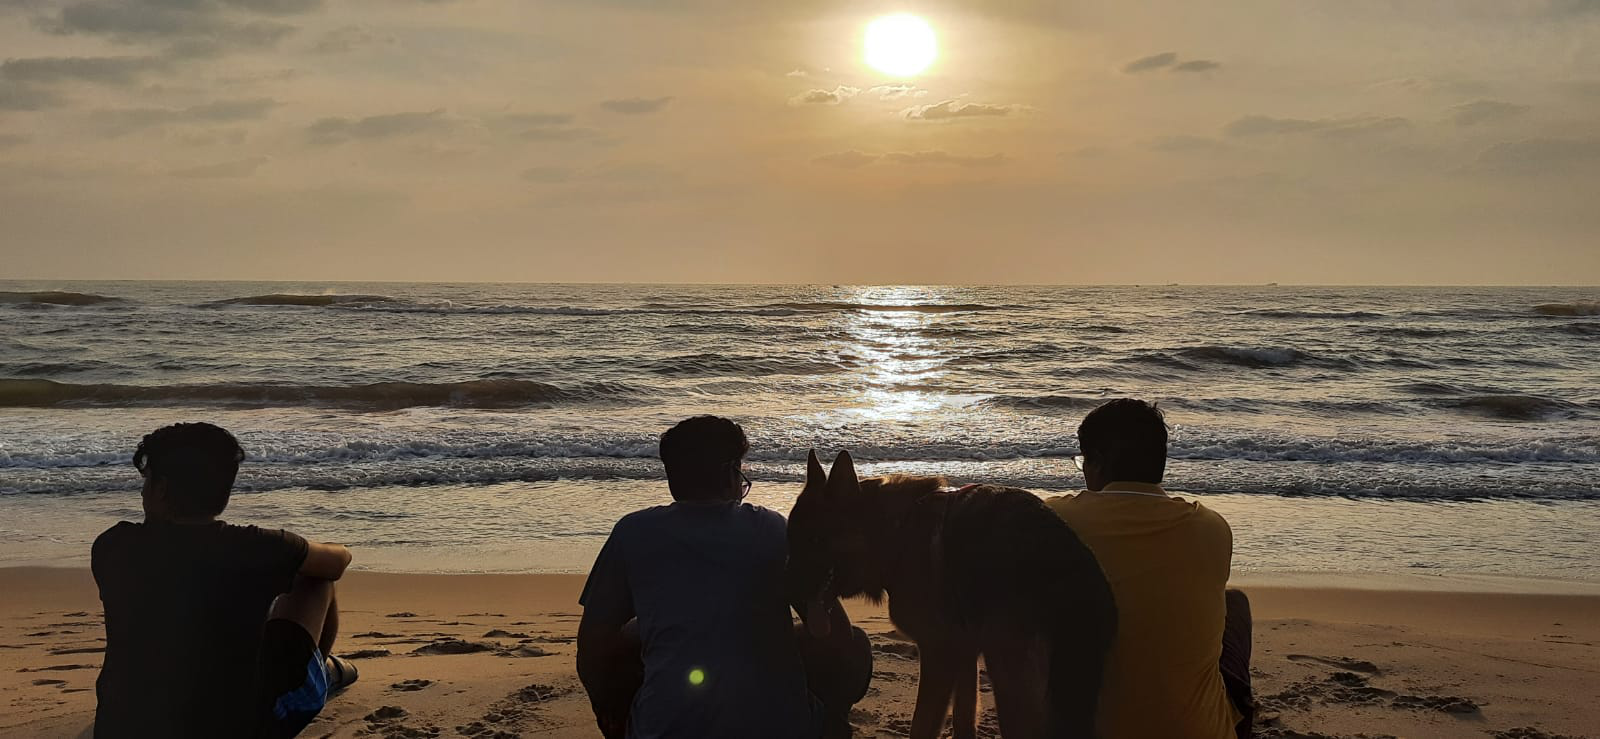

In [496]:
img = Image.open('Pondy_Beach.jpeg')
img.show()
display(img)

In [497]:
i_a = np.asarray(img)
orig_img = i_a.astype(float).copy()

In [498]:
initial_image = np.asarray(img)

In [499]:
print(i_a.shape)

(739, 1600, 3)


In [500]:
#normalising the pixel values
i_a = i_a / 255.0

In [501]:
#converting the image into RGB columns
img_rs = i_a.reshape(-1,3)
print(img_rs.shape,orig_img.shape)

(1182400, 3) (739, 1600, 3)


In [502]:
#Centering the pixel values around the mean 
img_centered = img_rs - np.mean(img_rs, axis=0)

In [503]:
#Calculating the covariance matrix
img_cov = np.cov(img_centered, rowvar=False)
print(img_cov)

[[0.05628913 0.05082315 0.04047908]
 [0.05082315 0.04689683 0.03836993]
 [0.04047908 0.03836993 0.0327543 ]]


In [504]:
#Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eigh(img_cov)
print(eig_vals)
print(eig_vecs)

[6.37053124e-05 2.37534053e-03 1.33501221e-01]
[[-0.43642675  0.62850086 -0.64383101]
 [ 0.80419011 -0.04842181 -0.59239648]
 [-0.40349716 -0.7763002  -0.48430161]]


In [505]:
sort_perm = eig_vals[::-1].argsort()
sort_perm

array([2, 1, 0])

In [506]:
# sorting the values to get the pca compenents in order
eig_vals[::-1].sort()
eig_vecs = eig_vecs[:, sort_perm]
print(eig_vecs)

[[-0.64383101  0.62850086 -0.43642675]
 [-0.59239648 -0.04842181  0.80419011]
 [-0.48430161 -0.7763002  -0.40349716]]


In [507]:
# orienting the matrix with RGB channels
m1 = np.column_stack((eig_vecs))
print(m1)

[[-0.64383101 -0.59239648 -0.48430161]
 [ 0.62850086 -0.04842181 -0.7763002 ]
 [-0.43642675  0.80419011 -0.40349716]]


In [508]:
# creating a matrix for adding the new values
m2 = np.zeros((3, 1))
alpha = np.random.normal(0, 0.1)

In [509]:
m2[:, 0] = alpha * eig_vals[:]
print(m2)


[[-5.37759721e-03]
 [-9.56817064e-05]
 [-2.56613017e-06]]


In [510]:
# the new intensties values 
add_vect = np.matrix(m1) * np.matrix(m2)
print(add_vect)

[[ 0.00352019]
 [-0.0033732 ]
 [ 0.00227102]]


In [511]:
#adding them to the original image
for idx in range(3):   # RGB
    orig_img[..., idx] += add_vect[idx]

In [512]:
# transforming back to 0-255 scale
orig_img = np.clip(orig_img, 0.0, 255.0)
orig_img = orig_img.astype(np.uint8)

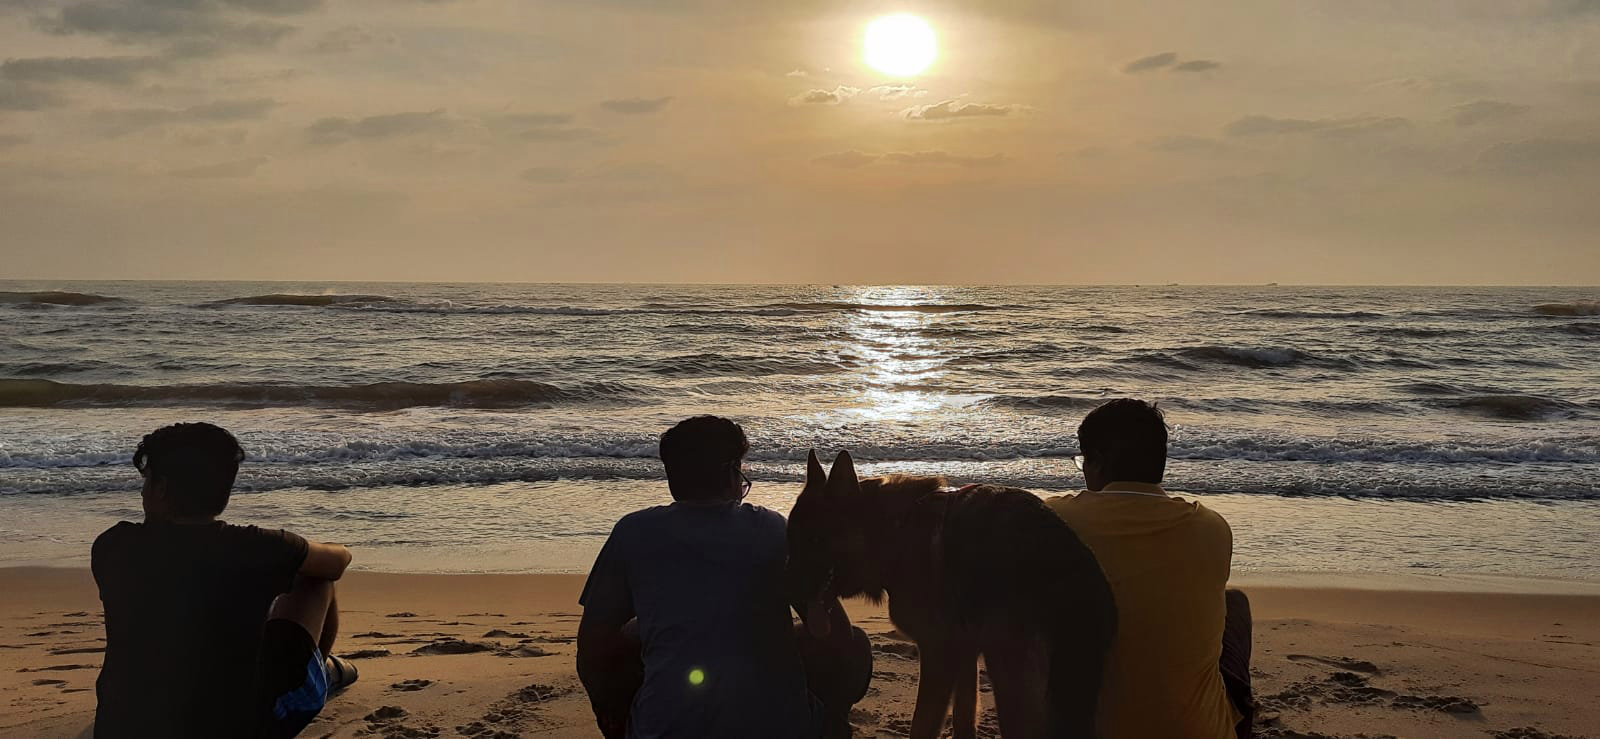

In [513]:
final_img = Image.fromarray(orig_img)
final_img.show()
display(final_img)

In [514]:
#there is a difference in their values which is not visibe to the naked eye
print(orig_img - initial_image, orig_img.shape, initial_image.shape)

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]] (739, 1600, 3) (739, 1600, 3)
